# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('../data/boston_data.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [2]:
data.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [4]:
# there seem to be a lot of outliers judging from the differences between the means and max of each column

In [5]:
# we check with the correlation matrix whether the variables are relevant to explain mdev
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


In [6]:
data.drop('chas', inplace=True, axis=1)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [7]:
data.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

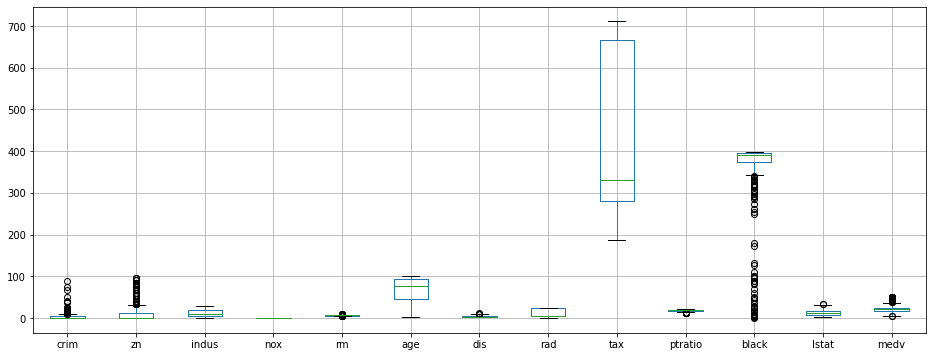

In [8]:
# boxplot

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
boxplot = data.boxplot(column=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'])

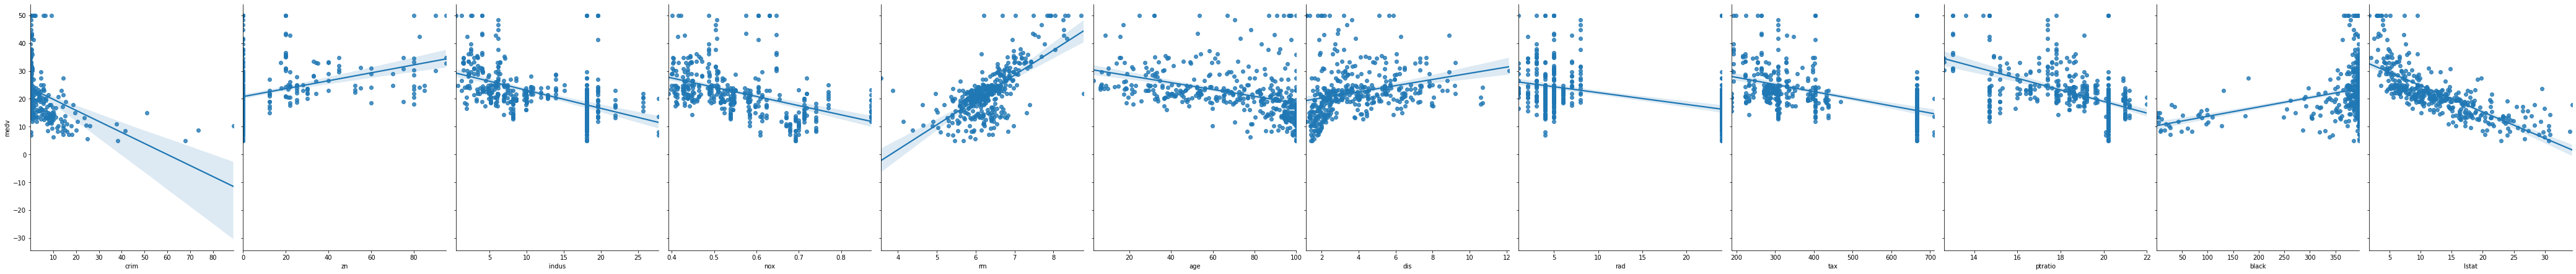

In [9]:
# scatterplot
sns.pairplot(data, x_vars=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'], y_vars=["medv"], height=6, aspect=.8, kind="reg");

In [10]:
'''''''''''''''''
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15, 12))
sns.regplot(x="age", y="medv", data=data, ax=ax1)
sns.regplot(x="crim", y="medv", data=data, ax=ax2)
sns.regplot(x="zn", y="medv", data=data, ax=ax3)
sns.regplot(x="indus", y="medv", data=data, ax=ax4)
'''''''''''''''''

'\'\'\nf, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15, 12))\nsns.regplot(x="age", y="medv", data=data, ax=ax1)\nsns.regplot(x="crim", y="medv", data=data, ax=ax2)\nsns.regplot(x="zn", y="medv", data=data, ax=ax3)\nsns.regplot(x="indus", y="medv", data=data, ax=ax4)\n'


mdev and crim: correlation -0.4009558757372439


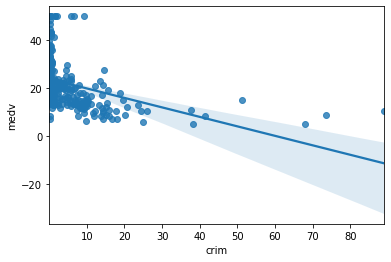


mdev and rm: correlation 0.683540993926214


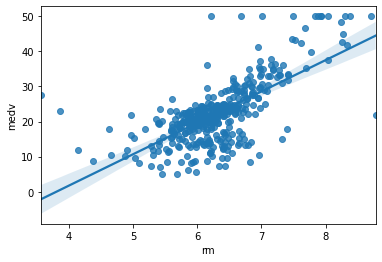


mdev and tax: correlation -0.4957924067170343


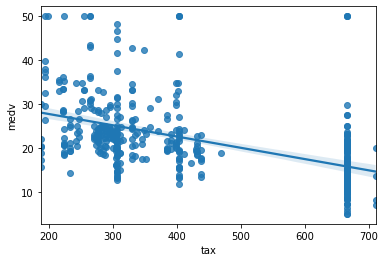


mdev and rad: correlation -0.4235083975722878


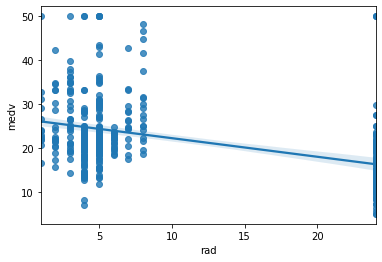


mdev and nox: correlation -0.43922519260567844


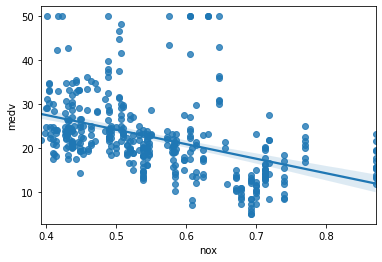


mdev and lstat: correlation -0.7426954940642158


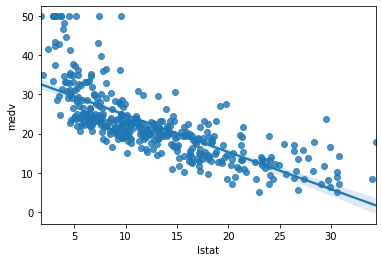

In [11]:
variables = ['crim', 'rm', 'tax', 'rad', 'nox', 'lstat']
for z in variables:
    print (f"\nmdev and {z}: correlation {(data['medv'].corr(data[z]))}")
    sns.regplot(x=z,y='medv' , data=data)
    plt.show()

In [12]:
'''''''''''
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
houses_boston_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
houses_boston_out
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
houses_boston_out.boxplot(column=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age'])
'''''''''''

"''\nQ1 = data.quantile(0.25)\nQ3 = data.quantile(0.75)\nIQR = Q3 - Q1\nhouses_boston_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]\nhouses_boston_out\nimport matplotlib.pyplot as plt\nfig, ax = plt.subplots(figsize=(10, 8))\nhouses_boston_out.boxplot(column=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age'])\n"

In [13]:
from scipy import stats
threshold=3
z=np.abs(stats.zscore(data))
data_clean=data[(z<3).all(axis=1)]
data_clean

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# Crime has a negative correlation with medv: the cheaper the house, the more crime there is in the neighbourhood
# rm has a positive relationship with medv: the more rooms, the more expensive the house is
# zm has negative relationship: houses per sq. ft. the higher the price
# etc.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

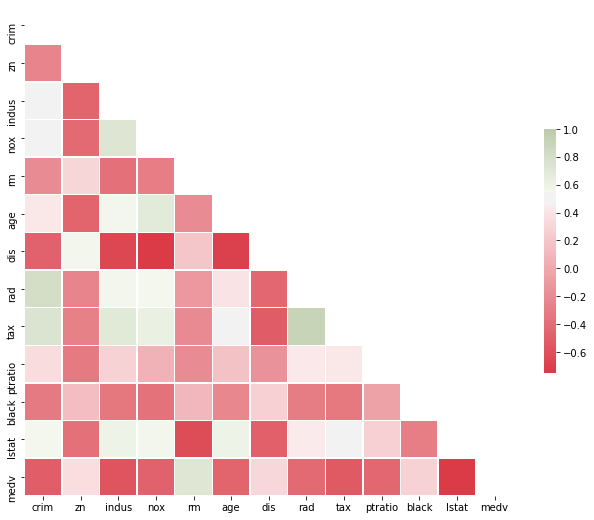

In [15]:
import seaborn as sns
corr = data_clean.corr()
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(10, 110, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
data_clean.medv.describe()

count    344.000000
mean      21.870349
std        7.049946
min        5.600000
25%       17.800000
50%       21.400000
75%       24.700000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [17]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_clean, test_size= 0.2, shuffle=True, random_state=123)
train_X = train_set.drop(columns='medv')
train_y =train_set['medv']
test_X = test_set.drop(columns='medv')
test_y =test_set['medv']

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [50]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [51]:
RFR = GridSearchCV(estimator=RandomForestRegressor(),
                             param_grid={"max_depth":[2, 4, 6, 8, 10]},
                             scoring='r2',
                             cv=5
                             )

In [53]:
RFR.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]}, scoring='r2')

Now, plot the score for each tree on the training set and on the testing set.

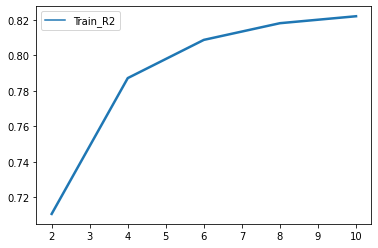

In [56]:
# Produce a plot with the score for the testing and training for the different max depths
cvres = RFR.cv_results_
    
results = pd.DataFrame(cvres['mean_test_score'], 
                       columns=['Train_R2'], 
                       index = RFR.param_grid['max_depth'])
 
sns.lineplot(data=results, linewidth=2.5)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [57]:
# The error increases as tree depth increases
# However, the error increases less each time we add a layer of depth
# until any additions of depth do not increase the error anymore

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# With maximum depth of 1 we suffer from bias
# With maximum depth of 10 we suffer from variance

''''''''''
If our model is too simple and has very few parameters then it may have high bias and low variance. 
On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. 
So we need to find the right/good balance without overfitting and underfitting the data.
''''''''''

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# max_depth=8

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here